In [327]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import Callback, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
import time

In [328]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [329]:
model = tf.keras.models.load_model("./step_model_350")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 100, 50, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 48, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 11, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 9, 32)         9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 4, 32)        

In [330]:
import pathlib
data_dir_irl = pathlib.WindowsPath("./test/")
data_dir_irl=pathlib.Path(data_dir_irl)

In [331]:
image_count=len(list(data_dir_irl.glob('*/*.jpg')))
print(image_count)

905


In [332]:
batch_size = 1
img_height = 100
img_width = 50

In [333]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_irl,
    validation_split=0.99,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 905 files belonging to 7 classes.
Using 895 files for validation.


In [334]:
class_names = test_ds.class_names

In [335]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [336]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [337]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    #loss='binary_crossentropy',
    metrics=['accuracy']
)

In [338]:
tstart = time.clock()
modPredict = model.predict(
    x= test_ds
)
tend = time.clock()

In [339]:
print(modPredict)

[[-209.10265  -363.65823  -162.79704  ... -319.61057    53.695045
  -231.62267 ]
 [-387.43802  -384.8727   -292.8362   ... -271.50055  -421.90836
  -529.96655 ]
 [-105.09362   175.46938  -238.97679  ... -623.4721   -190.38214
  -243.25108 ]
 ...
 [  12.303185  -81.19727   -63.676727 ... -147.11678   -60.18269
  -127.96475 ]
 [  88.17676  -105.64438  -170.3489   ... -557.9373   -234.29459
  -378.21744 ]
 [-478.66644  -606.616    -214.50485  ... -648.8894   -459.51126
  -879.9322  ]]


In [340]:
modPredictClass = []
for x in modPredict:
    classes = np.argmax(x)
    modPredictClass.append(classes)

In [341]:
print(modPredictClass)

[5, 3, 1, 0, 0, 3, 2, 0, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 1, 0, 0, 2, 3, 2, 0, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 0, 3, 2, 3, 3, 3, 0, 3, 0, 3, 2, 1, 1, 3, 3, 1, 3, 1, 0, 3, 3, 3, 2, 3, 1, 3, 0, 1, 0, 0, 3, 2, 0, 3, 0, 0, 0, 3, 3, 1, 0, 3, 3, 0, 1, 4, 0, 2, 1, 0, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 3, 6, 3, 4, 0, 3, 2, 2, 3, 4, 3, 2, 3, 0, 0, 0, 0, 3, 3, 2, 0, 5, 3, 3, 0, 3, 3, 3, 4, 1, 0, 0, 2, 3, 0, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0, 3, 3, 2, 0, 3, 2, 0, 3, 2, 5, 3, 2, 2, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 2, 0, 0, 3, 0, 0, 1, 3, 3, 2, 3, 3, 2, 3, 2, 0, 1, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 1, 3, 2, 1, 2, 2, 3, 3, 3, 3, 2, 3, 0, 3, 0, 2, 4, 3, 3, 3, 3, 0, 5, 3, 1, 3, 2, 2, 1, 0, 1, 3, 0, 0, 2, 1, 0, 0, 0, 3, 6, 3, 2, 3, 0, 3, 3, 3, 3, 2, 6, 3, 2, 3, 1, 3, 3, 0, 2, 3, 3, 2, 0, 0, 2, 2, 1, 0, 2, 0, 3, 4, 3, 0, 2, 2, 3, 3, 0, 0, 0, 3, 2, 2, 2, 2, 3, 3, 2, 5, 0, 0, 1, 1, 3, 3, 2, 4, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 5, 0, 0, 0, 0, 2, 2, 1, 3, 

In [342]:
for enum in test_ds.enumerate():
    print(enum)
    break

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, (<tf.Tensor: shape=(1, 100, 50, 3), dtype=float32, numpy=
array([[[[193.      , 127.      ,  95.      ],
         [192.69    , 127.      ,  95.      ],
         [192.15    , 127.      ,  95.      ],
         ...,
         [192.85    , 129.15    ,  93.      ],
         [192.31    , 129.69    ,  93.      ],
         [192.      , 130.      ,  93.      ]],

        [[193.505   , 127.505   ,  95.505   ],
         [193.195   , 127.66155 ,  95.1919  ],
         [192.655   , 127.93425 ,  94.6465  ],
         ...,
         [193.43076 , 129.57925 ,  93.505   ],
         [193.16345 , 129.84656 ,  93.505   ],
         [193.01    , 130.      ,  93.505   ]],

        [[194.      , 128.      ,  95.65    ],
         [193.69    , 128.31    ,  95.1385  ],
         [193.15    , 128.85    ,  94.247505],
         ...,
         [194.      , 130.      ,  93.65    ],
         [194.      , 130.      ,  93.65    ],
         [194.      , 130.      ,  93.65    ]],

  

In [343]:
labels = []
for i,(image,label) in test_ds.enumerate():
    labels.extend(label.numpy())
print(labels)

[5, 3, 1, 0, 0, 3, 2, 0, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 1, 0, 0, 2, 3, 2, 0, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 0, 3, 2, 3, 3, 3, 0, 2, 0, 3, 2, 1, 1, 3, 3, 1, 3, 1, 0, 3, 3, 3, 2, 3, 1, 3, 0, 1, 0, 0, 3, 2, 0, 3, 0, 0, 0, 3, 3, 1, 0, 3, 3, 0, 0, 4, 0, 2, 1, 0, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 3, 6, 3, 4, 0, 3, 2, 2, 3, 4, 3, 2, 3, 0, 0, 0, 0, 3, 3, 2, 0, 5, 3, 3, 0, 3, 3, 3, 4, 1, 0, 0, 2, 3, 0, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0, 3, 3, 2, 0, 3, 2, 0, 3, 2, 5, 3, 2, 2, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 0, 0, 3, 0, 0, 1, 3, 3, 2, 3, 3, 2, 3, 2, 0, 1, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 1, 3, 2, 1, 5, 2, 3, 3, 3, 3, 2, 3, 0, 3, 0, 0, 4, 3, 3, 3, 3, 0, 5, 3, 1, 3, 2, 2, 1, 0, 1, 3, 0, 0, 2, 1, 0, 0, 0, 3, 6, 3, 2, 3, 0, 3, 3, 3, 3, 2, 6, 3, 2, 3, 1, 3, 3, 0, 2, 3, 3, 2, 0, 0, 2, 2, 1, 0, 2, 0, 3, 4, 3, 0, 2, 2, 0, 3, 0, 0, 0, 3, 2, 2, 2, 2, 3, 3, 2, 5, 0, 0, 1, 1, 3, 3, 2, 4, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 5, 0, 0, 0, 0, 2, 2, 1, 3, 

In [344]:
total = len(labels)
count = 0
for i in range(total):
    if(labels[i] == modPredictClass[i]):
        count+=1
accPercent = count/total
print(count/total) 

0.9832402234636871


In [345]:
from sklearn.metrics import f1_score, confusion_matrix
confMat = confusion_matrix(labels, modPredictClass)
print(confMat)

[[222   1   1   1   0   0   0]
 [  0  66   0   0   0   0   0]
 [  0   1 197   1   0   0   0]
 [  0   0   6 338   0   0   0]
 [  0   0   0   0  19   0   0]
 [  1   0   2   0   0  31   1]
 [  0   0   0   0   0   0   7]]


In [346]:
print(class_names)


['green', 'green_arrow', 'none', 'red', 'red_arrow', 'yellow', 'yellow_arrow']


In [347]:
import matplotlib.pyplot as plt
import seaborn as sns


0.9832402234636871
took  1167.3552000002019


Text(0.5, 62.15999999999998, 'Predicted label')

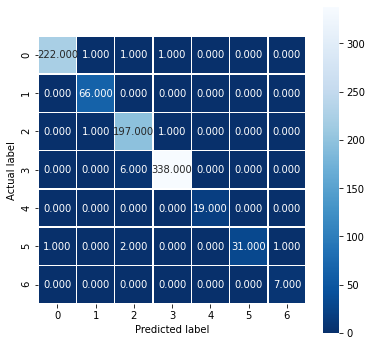

In [348]:
print(accPercent)
timed = tend - tstart
print("took ", timed * 1000)
plt.figure(figsize=(6,6))
sns.heatmap(confMat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')